In [29]:
import cv2, os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [30]:
df = pd.read_csv('labels.csv')


In [ ]:
IMG_SIZE = 128
X = []
y = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join('data/coal_images', row['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  

    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0
        X.append(img)
        y.append(row[1:].values)
    else:
        print(f"Skipped: {img_path}")

X = np.array(X).astype(np.float32)
X = np.expand_dims(X, axis=-1)  
y = np.array(y).astype(np.float32)


100%|██████████| 3902/3902 [00:04<00:00, 910.52it/s] 


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3121, 128, 128, 1)
y_train shape: (3121, 2)


In [33]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    InputLayer(input_shape=(128, 128, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(2) 
])



model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

model.summary()


d:\softwares\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,584,834 (17.49 MB)

 Trainable params: 4,583,874 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

Num GPUs Available: 0


In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=48,
    callbacks=[lr_scheduler]
)


Epoch 1/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 475ms/step - loss: 23.0019 - mae: 3.7462 - val_loss: 632.4382 - val_mae: 18.1453 - learning_rate: 1.0000e-04
Epoch 2/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - loss: 19.0519 - mae: 3.3533 - val_loss: 407.9475 - val_mae: 14.6064 - learning_rate: 1.0000e-04
Epoch 3/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 470ms/step - loss: 19.6795 - mae: 3.4080 - val_loss: 284.5157 - val_mae: 12.3515 - learning_rate: 1.0000e-04
Epoch 4/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 495ms/step - loss: 18.7432 - mae: 3.2724 - val_loss: 190.1979 - val_mae: 10.2713 - learning_rate: 1.0000e-04
Epoch 5/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 500ms/step - loss: 18.3124 - mae: 3.2126 - val_loss: 100.2213 - val_mae: 7.6878 - learning_rate: 1.0000e-04
Epoch 6/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - loss: 18.1215 - mae: 3.1887 - val_loss: 32.1171 - val_mae: 4.1708 - learning_rate: 1.0000e-04
Epoch 7/48
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 498ms/step - loss: 17.8714 - mae: 3.1668 - val_loss: 8.

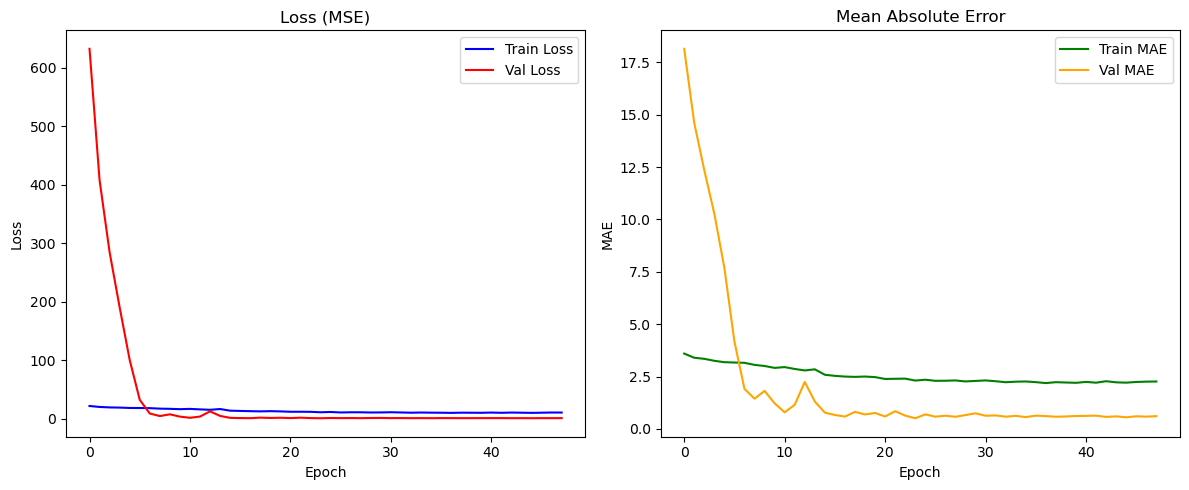

In [38]:
# Plot Loss and MAE
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', color='green')
plt.plot(history.history['val_mae'], label='Val MAE', color='orange')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
# Predict on test data
predictions = model.predict(X_test)

# Compare first 10 predictions
for i in range(10):
    true_vals = y_test[i]
    pred_vals = predictions[i]
    print(f"Sample {i+1}:")
    print(f"   True Moisture: {true_vals[0]:.2f}, Predicted: {pred_vals[0]:.2f}")
    print(f"   True Ash     : {true_vals[1]:.2f}, Predicted: {pred_vals[1]:.2f}")
    print("---")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Sample 1:
   True Moisture: 3.76, Predicted: 3.65
   True Ash     : 41.68, Predicted: 40.23
---
Sample 2:
   True Moisture: 4.52, Predicted: 4.47
   True Ash     : 37.92, Predicted: 36.78
---
Sample 3:
   True Moisture: 4.32, Predicted: 3.72
   True Ash     : 38.89, Predicted: 37.63
---
Sample 4:
   True Moisture: 4.38, Predicted: 4.41
   True Ash     : 38.59, Predicted: 36.45
---
Sample 5:
   True Moisture: 4.14, Predicted: 4.01
   True Ash     : 39.80, Predicted: 38.57
---
Sample 6:
   True Moisture: 4.24, Predicted: 4.13
   True Ash     : 39.29, Predicted: 37.89
---
Sample 7:
   True Moisture: 4.30, Predicted: 4.18
   True Ash     : 39.01, Predicted: 37.95
---
Sample 8:
   True Moisture: 4.51, Predicted: 4.16
   True Ash     : 37.93, Predicted: 36.84
---
Sample 9:
   True Moisture: 3.87, Predicted: 4.00
   True Ash     : 41.13, Predicted: 40.01
---
Sample 10:
   True Moisture: 4.61, Predicted: 4.29
   True Ash     : 37.44, Predicted: 36.25
---

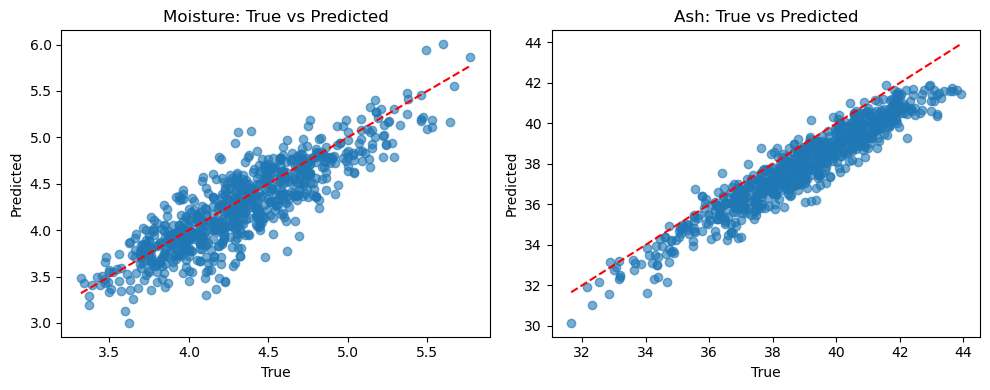

In [40]:
moisture_true = y_test[:, 0]
ash_true = y_test[:, 1]
moisture_pred = predictions[:, 0]
ash_pred = predictions[:, 1]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(moisture_true, moisture_pred, alpha=0.6)
plt.plot([moisture_true.min(), moisture_true.max()], [moisture_true.min(), moisture_true.max()], 'r--')
plt.title('Moisture: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(ash_true, ash_pred, alpha=0.6)
plt.plot([ash_true.min(), ash_true.max()], [ash_true.min(), ash_true.max()], 'r--')
plt.title('Ash: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


Moisture RMSE: 0.24
Ash RMSE: 1.20


In [42]:
from sklearn.metrics import r2_score

moisture_r2 = r2_score(y_test[:, 0], predictions[:, 0])
ash_r2 = r2_score(y_test[:, 1], predictions[:, 1])

print(f"Moisture R² Score: {moisture_r2:.2f}")
print(f"Ash R² Score: {ash_r2:.2f}")


Moisture R² Score: 0.69
Ash R² Score: 0.70


In [43]:
model.save("coal_quality_model.h5")
